In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')

In [14]:
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

In [6]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [15]:
two_blobs_outliers.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


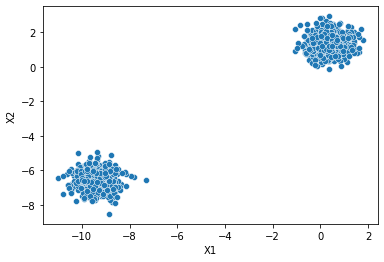

In [9]:
sns.scatterplot(data=two_blobs,x='X1',y='X2');

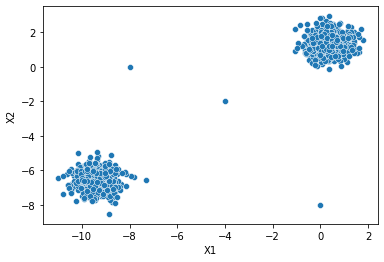

In [16]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2');

In [23]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1',y='X2',hue=labels,palette='Set1')

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
dbscan = DBSCAN()

We'll first create an instance of DBSCAN with just the default hyperparameters.

In [26]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

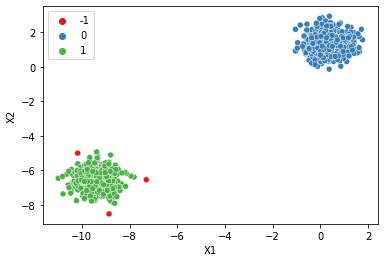

In [24]:
display_categories(dbscan,two_blobs)

SO with just the default hyperparameters we see that DBSCAN has returned a result with 3 points with value -1, which is outliers in DBSCAN.

So these points don't belong to any particular cluster and they are neither a core point nor a border point, they are outliers.

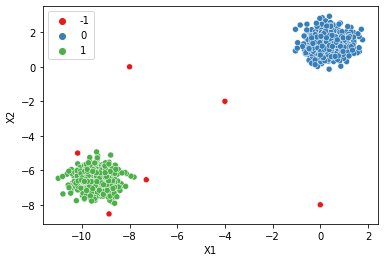

In [27]:
display_categories(dbscan,two_blobs_outliers)

This time dbscan additionally classifies these new individual points as outliers.

#### Now let's explore by tuning the hyperparameters of DBSCAN

#### 1. Really Small epsilon value.

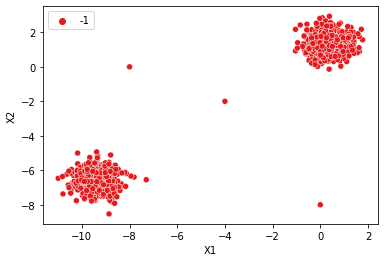

In [28]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outliers)

So a really small epsilon value means that the min distance from a point is very low and in such case pretty much all the points would get classified as outliers.

#### 2. Large epsilon value

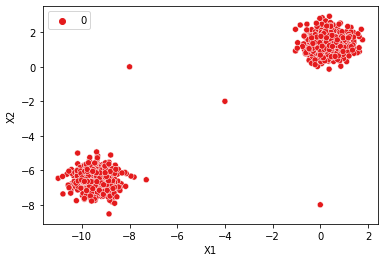

In [30]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

In case of Epsilon being really large the distance becomes too large and everything becomes one single cluster.

#### We don't want either of the above results, instead we want something that's reallyin the sweet zone.

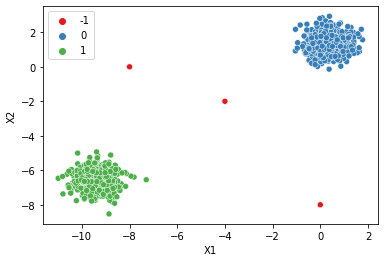

In [47]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

This now looks kinda good.

In [48]:
# We can check the labels now.
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [49]:
# we can find mong these now what the different clusters were

In [50]:
# Getting the total outliers
np.sum(dbscan.labels_ == -1)

3

In [51]:
# Percentage of outliers
100 * np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)

0.29910269192422734

So roughly 0.3% of the points make outliers.

In [52]:
len(dbscan.labels_)

1003

In [54]:
# No of unique clusters formed
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [56]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [57]:
len(np.unique(dbscan.labels_))

3

### Now we will plot out different epsilon values vs the no of outliers found and percentage of outliers formed.

In [58]:
outlier_percent = []
no_of_outliers = []
no_of_cluster_formed = []

for epsilon in np.linspace(0.001,10,100):
    dbscan = DBSCAN(eps=epsilon)
    # We'll use fit here not fit_predict as with just fit we can get the labels
    dbscan.fit(two_blobs_outliers)
    
    # Total no. of outliers found
    no_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Total_percentage of outliers found
    outlier_percent.append(100 * np.sum(dbscan.labels_ == -1)/len(dbscan.labels_))
    
    # Number of unique clusters formed 
    no_of_cluster_formed.append(len(np.unique(dbscan.labels_)))

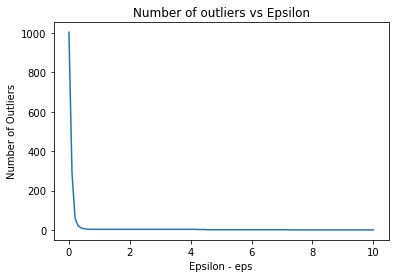

In [59]:
plt.plot(np.linspace(0.001,10,100), no_of_outliers)
plt.title('Number of outliers vs Epsilon')
plt.xlabel('Epsilon - eps')
plt.ylabel('Number of Outliers');

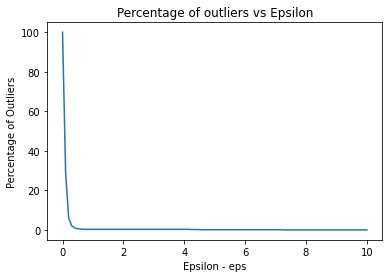

In [60]:
plt.plot(np.linspace(0.001,10,100), outlier_percent)
plt.title('Percentage of outliers vs Epsilon')
plt.xlabel('Epsilon - eps')
plt.ylabel('Percentage of Outliers');

#### So we see this extreme kind od drop immediately after 1.
We can further visualize it by setting xlim

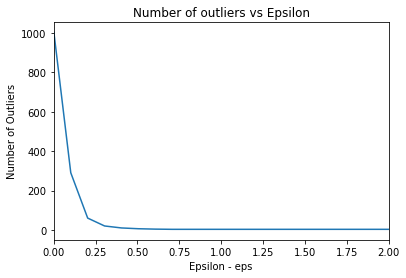

In [62]:
plt.plot(np.linspace(0.001,10,100), no_of_outliers)
plt.title('Number of outliers vs Epsilon')
plt.xlabel('Epsilon - eps')
plt.ylabel('Number of Outliers')
plt.xlim(0,2);

#### We still are not able see a smooth curve so lets tweek the epsilon value again.

In [63]:
outlier_percent = []
no_of_outliers = []
no_of_cluster_formed = []

for epsilon in np.linspace(0.001,7,200):
    dbscan = DBSCAN(eps=epsilon)
    # We'll use fit here not fit_predict as with just fit we can get the labels
    dbscan.fit(two_blobs_outliers)
    
    # Total no. of outliers found
    no_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Total_percentage of outliers found
    outlier_percent.append(100 * np.sum(dbscan.labels_ == -1)/len(dbscan.labels_))
    
    # Number of unique clusters formed 
    no_of_cluster_formed.append(len(np.unique(dbscan.labels_)))

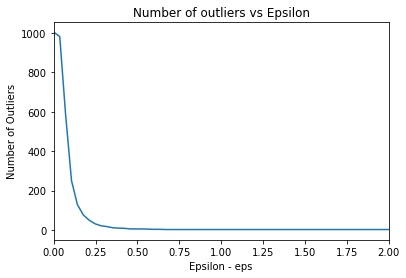

In [65]:
plt.plot(np.linspace(0.001,7,200), no_of_outliers)
plt.title('Number of outliers vs Epsilon')
plt.xlabel('Epsilon - eps')
plt.ylabel('Number of Outliers')
plt.xlim(0,2);

We get a much smoother curve since we doubled the no of points.

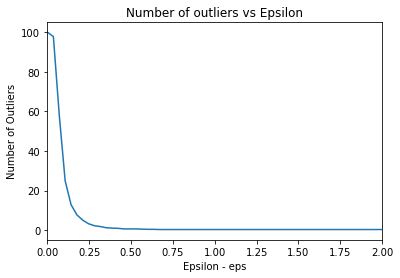

In [66]:
plt.plot(np.linspace(0.001,7,200), outlier_percent)
plt.title('Number of outliers vs Epsilon')
plt.xlabel('Epsilon - eps')
plt.ylabel('Number of Outliers')
plt.xlim(0,2);

#### And this particlar case we are expecting 3 outliers so we can create a horizontal line of the y axis at 3 to see the effects of reducing o of outliers as the epsilon increases.

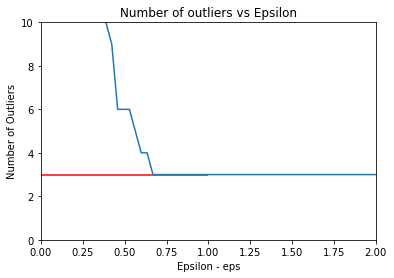

In [75]:
plt.plot(np.linspace(0.001,7,200), no_of_outliers)
plt.title('Number of outliers vs Epsilon')
plt.xlabel('Epsilon - eps')
plt.ylabel('Number of Outliers')
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=1,color='red');

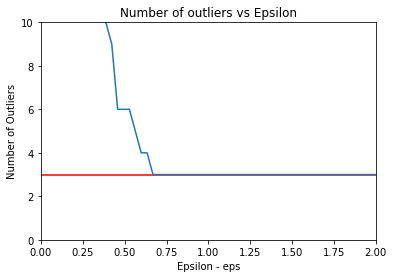

In [74]:
plt.plot(np.linspace(0.001,7,200), no_of_outliers)
plt.title('Number of outliers vs Epsilon')
plt.xlabel('Epsilon - eps')
plt.ylabel('Number of Outliers')
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red');

So So twe should begin to see where we actually start dropping to get 3 outliers as per our expectation.

#### And we can see around the epsilon>0.5 and <=0.75 we get our required sweet zone of epsilon value we were searching for.

We can confirm this value of eps by actually creating a new model with value.

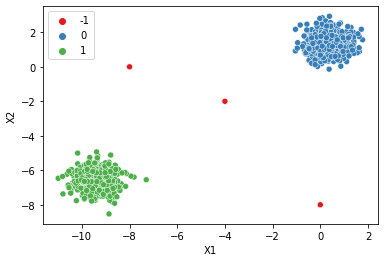

In [77]:
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan,two_blobs_outliers)

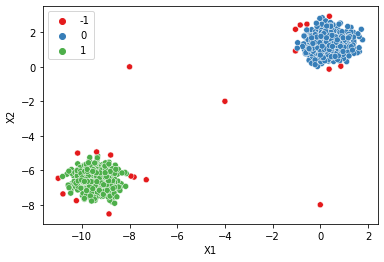

In [79]:
# Trying something smaller than the value we found
dbscan = DBSCAN(eps=0.3)
display_categories(dbscan,two_blobs_outliers)

In this case we can see that we start getting outliers as we drop below the mark of epsilon we found.

### So this is based on our intuition that how to compare out assumption of having a particular no of outliers with what the plot shows and based on it compare and finalize the epsilon value.

### Plotting against the outlier percentage

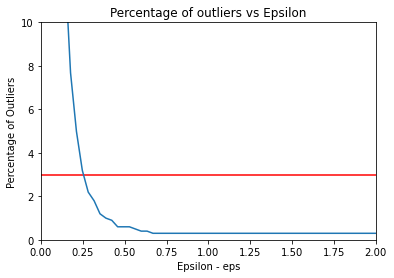

In [81]:
plt.plot(np.linspace(0.001,7,200), outlier_percent)
plt.title('Percentage of outliers vs Epsilon')
plt.xlabel('Epsilon - eps')
plt.ylabel('Percentage of Outliers')
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red');

We can again tweek in the values for this

### Minimum no of points

So we have to remember that as the min no of points goes on increasing there would be individual points forming individual cluster seperations and more outliers would be found.

In [82]:
outlier_percent = []
no_of_outliers = []
no_of_cluster_formed = []

for n in np.arange(1,100):
    dbscan = DBSCAN(min_samples=n)
    # We'll use fit here not fit_predict as with just fit we can get the labels
    dbscan.fit(two_blobs_outliers)
    
    # Total no. of outliers found
    no_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Total_percentage of outliers found
    outlier_percent.append(100 * np.sum(dbscan.labels_ == -1)/len(dbscan.labels_))
    
    # Number of unique clusters formed 
    no_of_cluster_formed.append(len(np.unique(dbscan.labels_)))

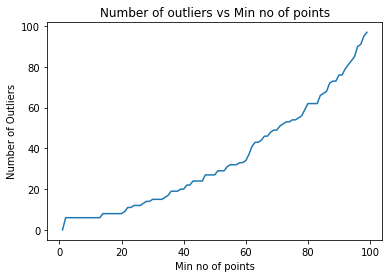

In [87]:
plt.plot(np.arange(1,100), no_of_outliers)
plt.title('Number of outliers vs Min no of points')
plt.xlabel('Min no of points')
plt.ylabel('Number of Outliers');

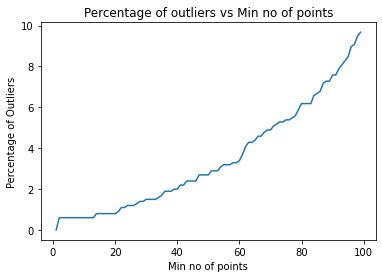

In [88]:
plt.plot(np.arange(1,100), outlier_percent)
plt.title('Percentage of outliers vs Min no of points')
plt.xlabel('Min no of points')
plt.ylabel('Percentage of Outliers');

In [86]:
no_of_cluster_formed

[8,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

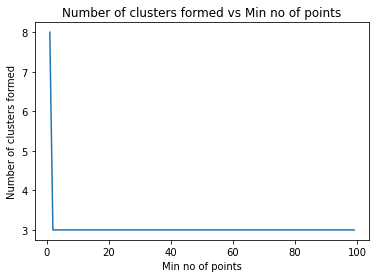

In [89]:
plt.plot(np.arange(1,100), no_of_cluster_formed)
plt.title('Number of clusters formed vs Min no of points')
plt.xlabel('Min no of points')
plt.ylabel('Number of clusters formed');

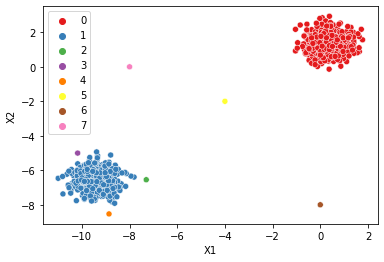

In [90]:
# Tweeking the model to see the above result
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

So the earlier seen outliers are no longer considered as outliers but they are considered as individual clusters, because recall that min_samples=1 also means the point istelf is also counted thereby making it a cluster as it satifies the mi_samples==1 condition

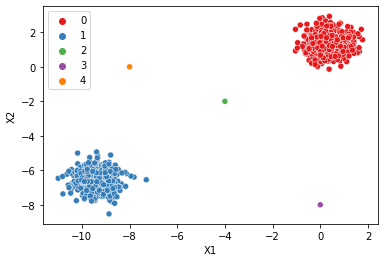

In [92]:
# Tweeking the model to see the above result
dbscan = DBSCAN(min_samples=1,eps=0.75)
display_categories(dbscan,two_blobs_outliers)

So now dbscan is trying to combine both these hyperparamters to cluster the points. Again no point will be classified as an outlier given min_samples=1.

## No point will be classified as an outlier given min_samples=1.

This could be useful to you if you wanted to think about things in terms of single point clusters instead of outliers.

This typically is not the case.

So as a typical count for the min no of samples, the min no of samples should be two times the dimensions of the data.

In [94]:
two_blobs_outliers.shape

(1003, 2)

In [95]:
two_blobs_outliers.shape[1]

2

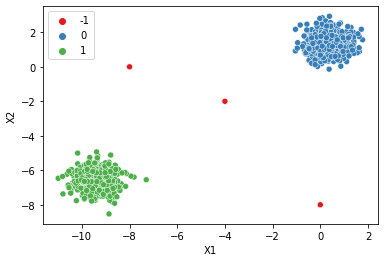

In [96]:
num_dimensions = 2 * two_blobs_outliers.shape[1]

# Min no of points = 2 times the dimension of the data
dbscan = DBSCAN(min_samples=num_dimensions,eps=0.75)
display_categories(dbscan,two_blobs_outliers)

And this strategy for min no of samples would give us the desired result.